Задача 1

In [ ]:
import numpy as np
a= np.random.random((10,3))
b=a-[0.5,0.5,0.5]
c=np.min(abs(b)-0.5,axis=1)
print(c)

Задача 2

In [ ]:
import numpy as np
a= np.random.random((6,6))
b=a
np.transpose(b)
for i in range(6):
    print(a[i].sum()/b[i].max())


Задача 3

In [ ]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

mask= x==0
print (x[1:][mask[:-1]].max())



Задача 4

In [ ]:
import numpy as np
x = np.ones(10) 
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

x+=np.bincount(i,minlength=len(x))
print (x)

Задача 5

In [ ]:
import numpy as np
a=np.arange(16).reshape(4,4)
di= [a[::-1,:].diagonal(i) for i in range(-a.shape[0]+1, a.shape[1])]
b={j:di[j] for j in range(7)}
print (b)

Задача 6. Алгоритм k-means

10


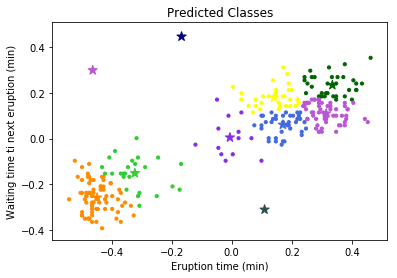

In [2]:
import numpy as np
def get_labels(pts, centroids,k):
    dist = np.arange(k*pts.shape[0]).reshape(k, pts.shape[0])
    dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
    arr_of_closest_to_centroid=np.argmin(dist, axis=0)
    old_arr=np.zeros((k,pts.shape[1]))
    mask=[False]*k
    while np.linalg.norm(old_arr-centroids)>0.0000000000001 :
        dist= [np.linalg.norm(pts - centroids[i], axis=1) for i in range(k)]
        arr_of_closest_to_centroid=np.argmin(dist, axis=0)
        
        old_arr=centroids.copy()
        mask= [arr_of_closest_to_centroid==i  for i in range(k)]
        for i in range(k):
            if any(mask[i]):
                centroids[i]=pts[mask[i]].mean(0)
        
    return arr_of_closest_to_centroid, centroids
data = np.loadtxt('./faithful.dat', skiprows=26)[:, 1:]
data= (data-data.mean(axis=0))/(data.mean(axis=0))
import matplotlib.pyplot as plt
k=int(input())

col=['mediumorchid', 'blueviolet', 'navy', 'royalblue', 'darkslategrey', 'limegreen', 'darkgreen', 'yellow', 'darkorange']
col=np.array(col*10)
centroids = np.random.uniform(-0.5, 0.5,data.shape[1]*k).reshape((k, data.shape[1]))
labels, centroids = get_labels(data, centroids,k)
plt.scatter(*data.T, c=col[labels[:]], s=10)
plt.scatter(*centroids.T, c=col[:], s=95, marker='*')
plt.title('Predicted Classes')
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()